In [1]:
#basic package
import tqdm
import os
import numpy as np
import pandas as pd
import sys
import time
import glob
import datetime as dt
import itertools
import math
import random
import pickle
from scipy import stats
from numpy.linalg import eig #eigenvector decomposition

#plot
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap  # to define our own palette for plots
from matplotlib import pyplot #barplot

C:\Users\camil\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\camil\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\camil\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
import config_origins as config

In [3]:
print('change the configuration file if not done yet!')
path_extracted_data = config.path_extracted_data
id_run = config.id_run
path_extracted_data
name = 'OFH'

change the configuration file if not done yet!


In [4]:
pal_treat_ = {'OFH':'orangered','TRAN':'royalblue'}
pal_pens = {3:'lightsalmon', 5:'indianred', 7:'grey', 9:'tomato', 11:'red', 
            4:'cornflowerblue', 6:'grey', 8:'deepskyblue',10:'skyblue', 12:'royalblue'}

# health indicators

In [5]:
df_HA = pd.read_csv(os.path.join(path_extracted_data, 'OFH_df_HA.csv'), sep=',')
df_HA['DOA'] = df_HA['DOA'].map(lambda x: int(x))
print(df_HA.shape) 
display(df_HA.head(3))

(844, 8)


,CLASS,date,Treatment,HenID,severity,FeatherDamage,DOA,PenID
0,REXP,2020-11-23,OFH,hen_164,0,NaN,173,pen9
1,REXP,2021-02-01,OFH,hen_181,16,14.0,243,pen9
2,REXP,2021-02-01,OFH,hen_82,4,8.0,243,pen5


In [6]:
df_W = pd.read_csv(os.path.join(path_extracted_data, 'OFH_df_FOCALBIRDS.csv'), sep=',')
print(df_W.shape) 
display(df_W.head(3))

(1121, 10)


,HenID,Treatment,CLASS,PenID,R-Pen,variable,weight,date,DOA,weight_norm
0,hen_46,TRAN,REXP,pen_10,2.0,10-12 juin weight,63.6,2020-06-10,7,0.470219
1,hen_17,OFH,LEXP,pen_5,1.0,10-12 juin weight,60.4,2020-06-10,7,0.369906
2,hen_161,TRAN,REXP,pen_10,4.0,10-12 juin weight,66.7,2020-06-10,7,0.567398


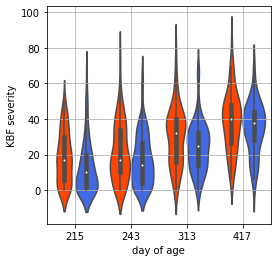

In [7]:
plt.figure(figsize=(4,4))
sns.violinplot(x='DOA',y='severity', hue='Treatment', palette=pal_treat_, data=df_HA[df_HA['DOA']>200], saturation=1);
plt.grid()
plt.ylabel('KBF severity')
plt.xlabel('day of age')
plt.legend([],[], frameon=False)
plt.savefig(os.path.join(path_extracted_data,'0FH_HA',name+'_severity_violine.png'), transparent=True, bbox_inches='tight')
plt.show()

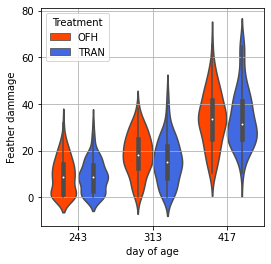

In [8]:
plt.figure(figsize=(4,4))
sns.violinplot(x='DOA',y='FeatherDamage', hue='Treatment', palette=pal_treat_,data=df_HA[df_HA['DOA']>230], saturation=1);
plt.ylabel('Feather dammage')
plt.xlabel('day of age')
plt.grid()
plt.savefig(os.path.join(path_extracted_data,'0FH_HA',name+'_FeatherDamage_violine.png'), transparent=True, bbox_inches='tight')
#sns.histplot(x='severity',hue='date', data=df_HA[df_HA['DOA']>173]);

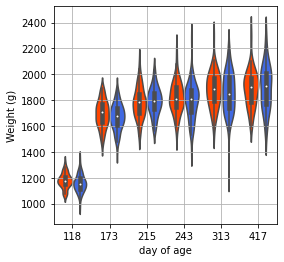

In [9]:
plt.figure(figsize=(4,4))
sns.violinplot(x='DOA',y='weight', hue='Treatment', palette=pal_treat_, data=df_W[df_W['DOA']!=7], saturation=1);
plt.legend([],[], frameon=False)
plt.ylabel('Weight (g)')
plt.xlabel('day of age')
plt.grid()
plt.savefig(os.path.join(path_extracted_data,'0FH_HA',name+'_Weight_violine.png'), transparent=True, bbox_inches='tight')
#sns.histplot(x='severity',hue='date', data=df_HA[df_HA['DOA']>173]);

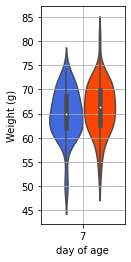

In [10]:
plt.figure(figsize=(1.5,4))
sns.violinplot(x='DOA',y='weight', hue='Treatment', palette=pal_treat_, data=df_W[df_W['DOA']==7], saturation=1);
plt.ylabel('Weight (g)')
plt.xlabel('day of age')
plt.legend([],[], frameon=False)
plt.grid()
plt.savefig(os.path.join(path_extracted_data,'0FH_HA',name+'_Weight_violine7.png'), transparent=True, bbox_inches='tight')
#sns.histplot(x='severity',hue='date', data=df_HA[df_HA['DOA']>173]);

# Table mean mvt

In [11]:
df_mvt = pd.read_csv(os.path.join(path_extracted_data, 'OFH_df_all_mvt.csv'), sep=',')
li_prop = ['propindoor_duration_2_Zone','propindoor_duration_4_Zone','propindoor_duration_5_Zone']
#because of nan we have to use split, cant convert nan to integer
#for mvtprop in li_prop:
#    df_mvt[mvtprop.replace('prop','perc')] = df_mvt[mvtprop].map(lambda x: x*100)
print(df_mvt.shape) 
display(df_mvt.head(3))

(38303, 36)


,HenID,PenID,level,Treatment,CLASS,DOA,WOA,DIB,WIB,weight_interp,...,perc_duration_1_Zone_nonan,propindoor_duration_5_Zone,propindoor_duration_4_Zone,propindoor_duration_2_Zone,propindoor_duration_5_Zone_rs,propindoor_duration_4_Zone_rs,propindoor_duration_2_Zone_rs,went_litter,stayed_top_tier,monthILB
0,hen_130,pen10,2020-10-05,TRAN,REXP,124,18,6,1,NaN,...,0.0,1.00,NaN,0.00,0.9900,NaN,0.0100,0,1,month1
1,hen_130,pen10,2020-10-06,TRAN,REXP,125,18,7,1,NaN,...,0.0,0.97,NaN,0.00,0.9606,NaN,0.0100,0,0,month1
2,hen_130,pen10,2020-10-07,TRAN,REXP,126,18,8,2,NaN,...,0.0,0.98,NaN,0.01,0.9704,NaN,0.0198,1,0,month1


In [12]:
li_mvt = ['propindoor_duration_2_Zone','propindoor_duration_5_Zone','mid_cum_Z4_h_Morning','vertical_travel_distance',
        'propindoor_duration_4_Zone','WentinWG']

In [13]:
df_table1 = df_mvt.groupby(['monthILB','Treatment'])[li_mvt].agg(lambda x:"%.2f" % round(np.nanmean(x),2)+' ±'+"%.2f" % round(np.nanstd(x),2)).reset_index()
df_table1['order'] = df_table1['monthILB'].map(lambda x: int(x.split('th')[-1]))
df_table1.sort_values('order', inplace=True)
df_table1.drop('order', axis=1, inplace=True)
df_table1 = df_table1.replace('nan ±nan','')
df_table1.rename(columns={'propindoor_duration_2_Zone':'proportion of time spent in litter floor',
                          'propindoor_duration_5_Zone':'proportion of time spent in top tier',
                          'mid_cum_Z4_h_Morning':'nestbox tier usage',
                          'vertical_travel_distance':'vertical travelled distance',
                          'propindoor_duration_4_Zone':'proportion of time spent in nestbox tier',
                          'WentinWG':'WG presence',
                          'monthILB':'month in the laying barn','Treatment':'treatment'}, inplace=True)
df_table1 = df_table1[['month in the laying barn','treatment','proportion of time spent in top tier','proportion of time spent in litter floor',
          'proportion of time spent in nestbox tier','WG presence','vertical travelled distance','nestbox tier usage']]
df_table1.to_csv(os.path.join(path_extracted_data, 'OFH_meanbehaviour_SD.csv'), index=False, sep=',')
df_table1

C:\Users\camil\AppData\Local\Temp/ipykernel_7408/3766290038.py:1: RuntimeWarning: Mean of empty slice
  df_table1 = df_mvt.groupby(['monthILB','Treatment'])[li_mvt].agg(lambda x:"%.2f" % round(np.nanmean(x),2)+' ±'+"%.2f" % round(np.nanstd(x),2)).reset_index()
C:\Users\camil\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,month in the laying barn,treatment,proportion of time spent in top tier,proportion of time spent in litter floor,proportion of time spent in nestbox tier,WG presence,vertical travelled distance,nestbox tier usage
0,month1,OFH,0.53 ±0.35,0.26 ±0.24,,0.44 ±0.50,28.51 ±24.07,
1,month1,TRAN,0.42 ±0.33,0.32 ±0.25,,0.51 ±0.50,39.02 ±27.69,
4,month2,OFH,0.41 ±0.29,0.31 ±0.19,0.07 ±0.04,0.62 ±0.48,47.03 ±22.45,5.00 ±1.08
5,month2,TRAN,0.30 ±0.26,0.39 ±0.17,0.07 ±0.05,0.65 ±0.48,58.67 ±22.55,5.31 ±1.24
7,month3,TRAN,0.28 ±0.26,0.41 ±0.17,0.07 ±0.04,0.67 ±0.47,63.99 ±26.70,4.29 ±0.85
6,month3,OFH,0.34 ±0.29,0.36 ±0.20,0.07 ±0.06,0.66 ±0.48,55.43 ±24.13,4.24 ±0.86
8,month4,OFH,0.33 ±0.27,0.38 ±0.19,0.08 ±0.07,0.62 ±0.49,61.64 ±26.76,4.19 ±0.94
9,month4,TRAN,0.27 ±0.25,0.42 ±0.16,0.08 ±0.04,0.69 ±0.46,68.68 ±28.42,4.14 ±0.95
10,month5,OFH,0.33 ±0.27,0.37 ±0.18,0.08 ±0.08,0.61 ±0.49,63.03 ±27.68,4.16 ±0.96
11,month5,TRAN,0.28 ±0.25,0.42 ±0.17,0.08 ±0.04,0.70 ±0.46,68.94 ±27.09,4.18 ±1.01


In [14]:
df_tableOFH = df_mvt[df_mvt['Treatment']=='OFH'].groupby('monthILB')[li_mvt].agg(lambda x:"%.2f" % round(np.nanmean(x),2)).reset_index()
df_tableTRAN = df_mvt[df_mvt['Treatment']=='TRAN'].groupby('monthILB')[li_mvt].agg(lambda x:"%.2f" % round(np.nanmean(x),2)).reset_index()
df_tableALL = df_tableOFH.copy()
for mvt in li_mvt:
    df_tableALL[mvt] = df_tableALL.apply(lambda x: x[mvt] + ' vs. ' +df_tableTRAN[df_tableTRAN['monthILB']==x['monthILB']][mvt].values[0], axis=1)
df_tableALL['order'] = df_tableALL['monthILB'].map(lambda x: int(x.split('th')[-1]))
df_tableALL.sort_values('order', inplace=True)
df_tableALL.drop('order', axis=1, inplace=True)
df_tableALL = df_tableALL.replace('nan vs.nan','')
df_tableALL.rename(columns={'propindoor_duration_2_Zone':'proportion of time spent in litter floor',
                          'propindoor_duration_5_Zone':'proportion of time spent in top tier',
                          'mid_cum_Z4_h_Morning':'nestbox tier usage',
                          'vertical_travel_distance':'vertical travelled distance',
                          'propindoor_duration_4_Zone':'proportion of time spent in nestbox tier',
                          'WentinWG':'WG presence',
                          'monthILB':'month in the laying barn'}, inplace=True)
df_tableALL = df_tableALL[['month in the laying barn','proportion of time spent in top tier','proportion of time spent in litter floor',
          'proportion of time spent in nestbox tier','WG presence','vertical travelled distance','nestbox tier usage']]
df_tableALL.to_csv(os.path.join(path_extracted_data, 'OFH_meanbehaviour.csv'), index=False, sep=',')
df_tableALL

C:\Users\camil\AppData\Local\Temp/ipykernel_7408/181114191.py:1: RuntimeWarning: Mean of empty slice
  df_tableOFH = df_mvt[df_mvt['Treatment']=='OFH'].groupby('monthILB')[li_mvt].agg(lambda x:"%.2f" % round(np.nanmean(x),2)).reset_index()
C:\Users\camil\AppData\Local\Temp/ipykernel_7408/181114191.py:1: RuntimeWarning: Mean of empty slice
  df_tableOFH = df_mvt[df_mvt['Treatment']=='OFH'].groupby('monthILB')[li_mvt].agg(lambda x:"%.2f" % round(np.nanmean(x),2)).reset_index()
C:\Users\camil\AppData\Local\Temp/ipykernel_7408/181114191.py:2: RuntimeWarning: Mean of empty slice
  df_tableTRAN = df_mvt[df_mvt['Treatment']=='TRAN'].groupby('monthILB')[li_mvt].agg(lambda x:"%.2f" % round(np.nanmean(x),2)).reset_index()
C:\Users\camil\AppData\Local\Temp/ipykernel_7408/181114191.py:2: RuntimeWarning: Mean of empty slice
  df_tableTRAN = df_mvt[df_mvt['Treatment']=='TRAN'].groupby('monthILB')[li_mvt].agg(lambda x:"%.2f" % round(np.nanmean(x),2)).reset_index()


,month in the laying barn,proportion of time spent in top tier,proportion of time spent in litter floor,proportion of time spent in nestbox tier,WG presence,vertical travelled distance,nestbox tier usage
0,month1,0.53 vs. 0.42,0.26 vs. 0.32,nan vs. nan,0.44 vs. 0.51,28.51 vs. 39.02,nan vs. nan
2,month2,0.41 vs. 0.30,0.31 vs. 0.39,0.07 vs. 0.07,0.62 vs. 0.65,47.03 vs. 58.67,5.00 vs. 5.31
3,month3,0.34 vs. 0.28,0.36 vs. 0.41,0.07 vs. 0.07,0.66 vs. 0.67,55.43 vs. 63.99,4.24 vs. 4.29
4,month4,0.33 vs. 0.27,0.38 vs. 0.42,0.08 vs. 0.08,0.62 vs. 0.69,61.64 vs. 68.68,4.19 vs. 4.14
5,month5,0.33 vs. 0.28,0.37 vs. 0.42,0.08 vs. 0.08,0.61 vs. 0.70,63.03 vs. 68.94,4.16 vs. 4.18
6,month6,0.30 vs. 0.24,0.40 vs. 0.44,0.09 vs. 0.09,0.65 vs. 0.73,66.50 vs. 72.47,4.46 vs. 4.52
7,month7,0.31 vs. 0.28,0.40 vs. 0.41,0.09 vs. 0.09,0.62 vs. 0.69,61.38 vs. 65.76,4.59 vs. 4.62
8,month8,0.30 vs. 0.29,0.41 vs. 0.41,0.08 vs. 0.08,0.69 vs. 0.72,58.36 vs. 58.61,4.78 vs. 4.74
9,month9,0.28 vs. 0.26,0.43 vs. 0.43,0.08 vs. 0.09,0.71 vs. 0.83,57.11 vs. 58.38,5.05 vs. 5.18
1,month10,0.27 vs. 0.26,0.43 vs. 0.43,0.08 vs. 0.08,0.68 vs. 0.80,52.95 vs. 53.14,5.34 vs. 5.36


# mvt high R investigation

In [15]:
df_mvt.head(3)

,HenID,PenID,level,Treatment,CLASS,DOA,WOA,DIB,WIB,weight_interp,...,perc_duration_1_Zone_nonan,propindoor_duration_5_Zone,propindoor_duration_4_Zone,propindoor_duration_2_Zone,propindoor_duration_5_Zone_rs,propindoor_duration_4_Zone_rs,propindoor_duration_2_Zone_rs,went_litter,stayed_top_tier,monthILB
0,hen_130,pen10,2020-10-05,TRAN,REXP,124,18,6,1,NaN,...,0.0,1.00,NaN,0.00,0.9900,NaN,0.0100,0,1,month1
1,hen_130,pen10,2020-10-06,TRAN,REXP,125,18,7,1,NaN,...,0.0,0.97,NaN,0.00,0.9606,NaN,0.0100,0,0,month1
2,hen_130,pen10,2020-10-07,TRAN,REXP,126,18,8,2,NaN,...,0.0,0.98,NaN,0.01,0.9704,NaN,0.0198,1,0,month1


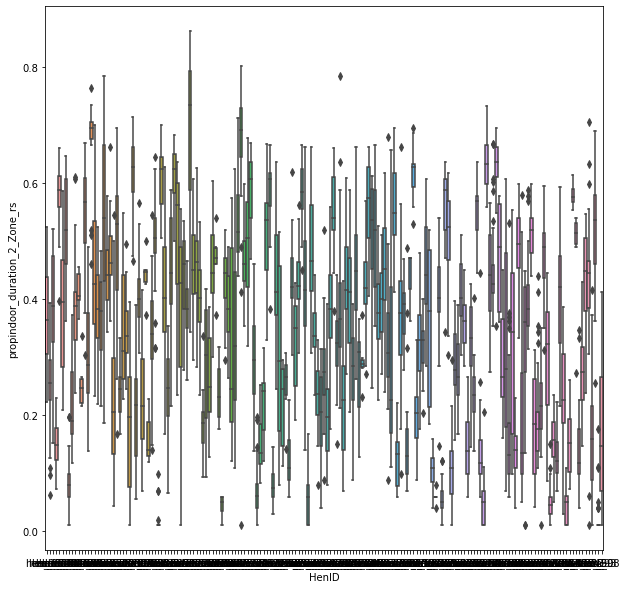

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x='HenID',y='propindoor_duration_2_Zone_rs',data=df_mvt[df_mvt['monthILB']=='month2']);

# egg growth curve

In [17]:
df_prod = pd.read_csv(os.path.join(path_extracted_data, 'OFH_performance', 'egg_growthcurve.csv'), sep=',')
print(df_prod.shape)
df_prod.head(3)

(30, 6)


,Unnamed: 0,Estimate,Std. Error,t value,Pr(>|t|),PenID
0,Asym,0.951955,0.007562,125.885056,2.100468e-71,3
1,xmid,24.049881,0.207618,115.836958,2.364101e-69,3
2,scal,4.135419,0.178141,23.214320,9.841249e-31,3


In [18]:
dico_pen_tr = config.dico_pen_tr
def matching_(x):
    if 'Asym' in x:
        return 'Asym'
    if 'xmid' in x:
        return 'xmid'
    if 'scal' in x:
        return 'scal'
    else:
        return None
df_prod['type'] = df_prod['Unnamed: 0'].map(lambda x: matching_(x))
df_prod['Treatment'] = df_prod['PenID'].map(lambda x: dico_pen_tr[x].split('-')[0])
display(df_prod['type'].value_counts())
display(df_prod['Treatment'].value_counts())
display(df_prod.head(3))

Asym    10
xmid    10
scal    10
Name: type, dtype: int64

OFH     15
TRAN    15
Name: Treatment, dtype: int64

,Unnamed: 0,Estimate,Std. Error,t value,Pr(>|t|),PenID,type,Treatment
0,Asym,0.951955,0.007562,125.885056,2.100468e-71,3,Asym,OFH
1,xmid,24.049881,0.207618,115.836958,2.364101e-69,3,xmid,OFH
2,scal,4.135419,0.178141,23.214320,9.841249e-31,3,scal,OFH


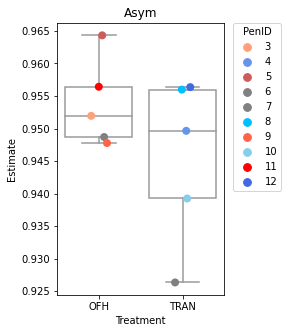

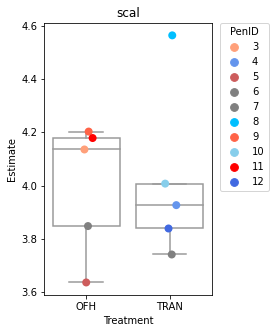

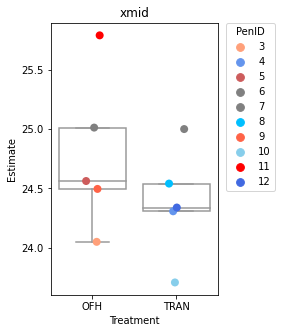

In [19]:
for type_,df_ in df_prod.groupby('type'):
    plt.figure(figsize=(3,5))
    sns.boxplot(x='Treatment',y='Estimate',data=df_, color='white', fliersize=0) #[pal_treat[tr] for tr in df_['Treatment'].tolist()]);
    sns.stripplot(x='Treatment',y='Estimate',data=df_, size=8, hue='PenID', palette=pal_pens)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='PenID')
    plt.title(type_)
    plt.savefig(os.path.join(path_extracted_data,'OFH_performance',type_+'_Weight_violine7.png'), transparent=True, bbox_inches='tight')
    plt.show();

# egg long term

In [20]:
#initial data
df_prodinit = pd.read_csv(os.path.join(path_extracted_data, 'df_eggdata.csv'), sep=',')
print(df_prodinit.shape)
print(df_prodinit['Date'].max())
df_prodinit.head(3)

(3360, 10)
2021-08-25


,PenID,Treatment,Date,DIB,WIB,Tier-bestand,#eggOutsideBoxPerTier,#eggPerTier,Treatment_allpens,Early_death
0,3,OFH,2020-09-24,-5,0,225,0.0,0.0,OFH,0.0
1,3,OFH,2020-09-25,-4,0,225,0.0,0.0,OFH,0.0
2,3,OFH,2020-09-26,-3,0,225,0.0,0.0,OFH,0.0


In [26]:
df_ltegg = df_prodinit[df_prodinit['DIB']>60].copy()
print(df_ltegg['DIB'].min(), df_ltegg['DIB'].max())

61 330


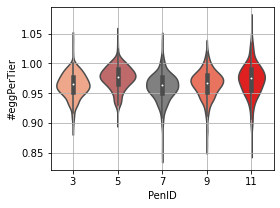

In [32]:
plt.figure(figsize=(4,3))
sns.violinplot(x='PenID',y='#eggPerTier',data=df_ltegg[df_ltegg['Treatment_allpens']=='OFH'],palette=pal_pens)
plt.grid(True)
plt.savefig(os.path.join(path_extracted_data,'OFH_performance','Longtermegg_OFH.png'), transparent=True, bbox_inches='tight')
plt.show();

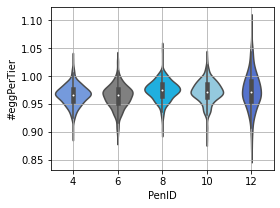

In [33]:
plt.figure(figsize=(4,3))
sns.violinplot(x='PenID',y='#eggPerTier',data=df_ltegg[df_ltegg['Treatment_allpens']=='TRAN'],palette=pal_pens)
plt.grid(True)
plt.savefig(os.path.join(path_extracted_data,'OFH_performance','Longtermegg_TRAN.png'), transparent=True, bbox_inches='tight')
plt.show();